# Exploratory data analysis (EDA)

In [1]:
# importing libraries
import datetime as dt

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import sweetviz as sv
from pandas.plotting import scatter_matrix

First let's import the data and explore it.

### Importing the data

In [2]:
# allow showing more rows and columns when using the method df.head()
pd.set_option("max_rows", 300, "max_columns", 300)

# reading the dataset
data_path = "../data"
churn = pd.read_csv(f"{data_path}/data.csv")

### Get to know the data

In [3]:
# visualizing the first lines of the dataset
churn.head(3)

,player_id,date,gender,vertical,deposit_approved_sum,withdrawal_approved_sum,turnover_cash_sum,winning_cash_sum,result_cash_sum,NGR_sum,bonus_cash_sum,session_sum
0,0004fd6b7433920d183e818e18efb97c1b02afb3,2013-01-21,female,NaN,31,0,0,0,0,0,0,2233
1,0004fd6b7433920d183e818e18efb97c1b02afb3,2013-01-22,female,NaN,0,0,0,0,0,0,0,1957
2,0004fd6b7433920d183e818e18efb97c1b02afb3,2013-01-29,female,casino_classic,0,0,73,43,-30,30,0,2313


In [4]:
# listing columns names
list(churn.columns)

['player_id',
 'date',
 'gender',
 'vertical',
 'deposit_approved_sum',
 'withdrawal_approved_sum',
 'turnover_cash_sum',
 'winning_cash_sum',
 'result_cash_sum',
 'NGR_sum',
 'bonus_cash_sum',
 'session_sum']

For the sake of clarity the explanatory variables and their meanings (not given in this task) are listed in **Table 1**.

|Table 1. Explanatory variables|                                 |
|--------------------------|-------------------------------------|
|**Name**                  | **Meaning**                         |
|player_id                 | unique user identification          | 
|date                      | event date                          |
|gender                    | gender                              |
|vertical                  | type of gambler                     |
|deposit_approved_sum      | volume of approved deposits         |
|withdrawal_approved_sum   | volume of approved withdrawals      |
|turnover_cash_sum         | volume of cash wagers               |
|winning_cash_sum          | volume of cash winnings to wagers   |
|result_cash_sum           | volume of cash wagers minus winnings| 
|NGR_sum                   | net gaming revenue                  |
|bonus_cash_sum            | volume of bonus wagers              |
|session_sum               | duration of the session             |

In [5]:
# showing dimensions of the dataset
print("Dimensions of the dataset:")
print(f" Number of rows: {churn.shape[0]}")
print(f" Number of columns: {churn.shape[1]}")
print()

Dimensions of the dataset:
 Number of rows: 117398
 Number of columns: 12



In [6]:
# show unique values
for col in churn.columns:
    print(f"{col: >24}: {churn[col].nunique()}")

               player_id: 10644
                    date: 365
                  gender: 2
                vertical: 4
    deposit_approved_sum: 3911
 withdrawal_approved_sum: 3852
       turnover_cash_sum: 11469
        winning_cash_sum: 11371
         result_cash_sum: 6389
                 NGR_sum: 6391
          bonus_cash_sum: 51
             session_sum: 25872


The total number of different customers in the datset is equal to ${10644}$. This indicates that for the same user the dataset presents several events that happened at different times.

In [7]:
# percentage of gambling modalities
churn["vertical"].value_counts(normalize=True).round(2)

casino_classic    0.71
sports            0.16
casino_live       0.10
mixture           0.03
Name: vertical, dtype: float64

There are 4 modalities of gambling games decribed by the feature `vertical`:
* cassino_classic
* sports
* cassino_live
* mixture

In [8]:
# gender distribution
churn["gender"].value_counts(normalize=True).round(2)

male      0.71
female    0.29
Name: gender, dtype: float64

The gender distribution in the dataset is:
* 71% male
* 29% female

We can also explore if there are any difference or similarities considering gender.

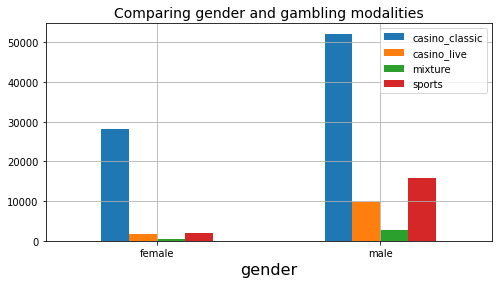

In [9]:
# gender and gambling modality trends
churn.groupby(["gender", "vertical"]).size().unstack().plot(
    kind="bar", stacked=False, rot=0, fontsize=10, figsize=(8, 4), align="center"
)
plt.xlabel("gender", fontsize=16)
plt.title("Comparing gender and gambling modalities", fontsize=14)
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [10]:
# showing some decriptive statistics
churn.describe()

,deposit_approved_sum,withdrawal_approved_sum,turnover_cash_sum,winning_cash_sum,result_cash_sum,NGR_sum,bonus_cash_sum,session_sum
count,117398.000000,117398.000000,117398.000000,117398.000000,117398.000000,117398.000000,117398.000000,117398.000000
mean,298.489003,215.655531,1958.918099,1872.552641,-86.365458,76.244706,5.011585,7528.739059
std,992.192515,1205.752819,10663.544409,10543.596034,1356.990338,1361.101563,11.919579,8789.722139
min,0.000000,0.000000,0.000000,0.000000,-79237.000000,-85220.000000,0.000000,0.000000
25%,0.000000,0.000000,30.000000,0.000000,-147.000000,0.000000,0.000000,2152.000000
50%,60.000000,0.000000,248.000000,164.000000,-30.000000,30.000000,0.000000,4117.000000
75%,235.000000,0.000000,1095.000000,982.750000,0.000000,145.000000,0.000000,9367.000000
max,79237.000000,93057.000000,905473.000000,899122.000000,85220.000000,79237.000000,50.000000,86400.000000


In [11]:
# summarizing some info about the dataset
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117398 entries, 0 to 117397
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   player_id                117398 non-null  object
 1   date                     117398 non-null  object
 2   gender                   116927 non-null  object
 3   vertical                 113307 non-null  object
 4   deposit_approved_sum     117398 non-null  int64 
 5   withdrawal_approved_sum  117398 non-null  int64 
 6   turnover_cash_sum        117398 non-null  int64 
 7   winning_cash_sum         117398 non-null  int64 
 8   result_cash_sum          117398 non-null  int64 
 9   NGR_sum                  117398 non-null  int64 
 10  bonus_cash_sum           117398 non-null  int64 
 11  session_sum              117398 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 10.7+ MB


The dataset is formed by 8 numerical and 4 categorical features. Since we have date, later we'll have to it to datetime format.

### Missing values

From the previous output we can set that the explainable variables `gender`, `vertical` have missing values. Lets take a closer look at this.

We have here at least to approaches, coding(using `isnull()`) or We can just visualize the missing values, in a more intuitive way, using the library `missingno`. The white lines in the `missingno` plot represent the missing values.

In [12]:
# total number of missing values, if they are present
print("Features with missing values:\n")
churn.isnull().sum()[churn.isnull().sum() > 0]

Features with missing values:



gender       471
vertical    4091
dtype: int64

The missing values correspond to:
* `gender` less than 1% of the dataset
* `vertical` around 3% of the dataset

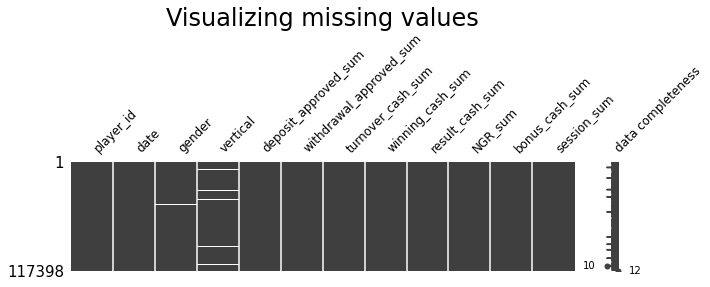

In [13]:
# visualize missing value matrix for the complete dataset
msno.matrix(churn, labels=True, fontsize=12, figsize=(10, 2))
plt.title("Visualizing missing values", fontsize=24)
plt.show()
plt.close()

### Visualizing the dataset with a scatter matrix

We can plot a scatter matrix to visualize the bivariate relationships between numeric variables in the dataset. The diagonal show the distribution of the variables.

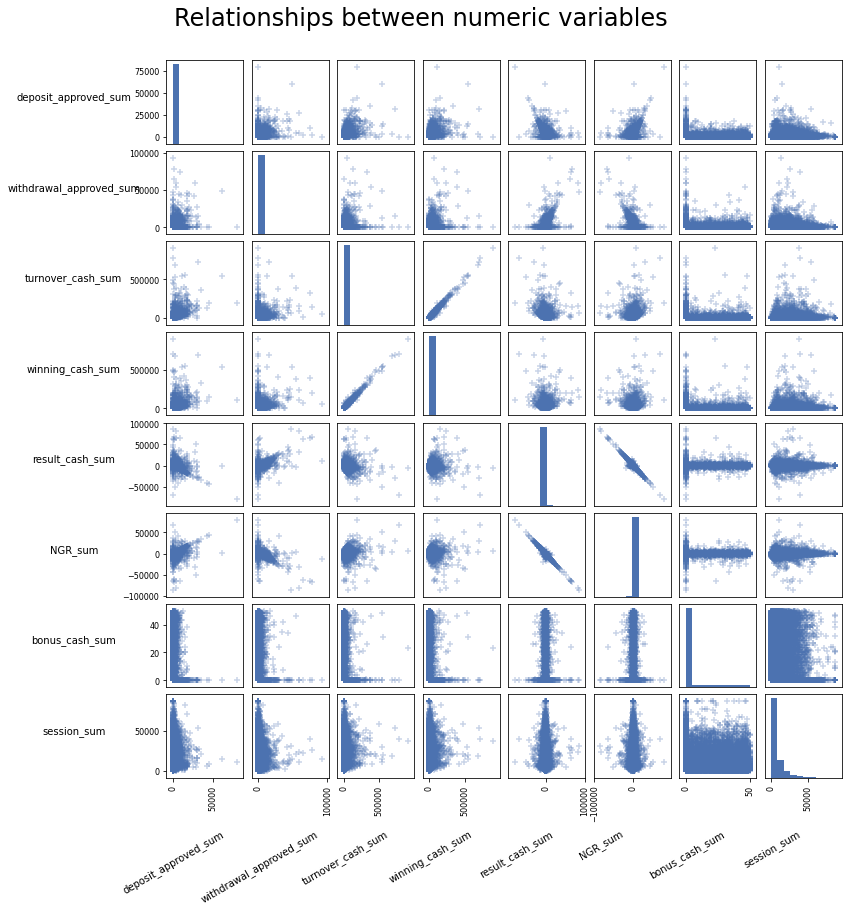

In [14]:
# visualize the dataset
plt.style.use("seaborn-deep")
sm = scatter_matrix(
    churn, alpha=0.3, diagonal="hist", range_padding=0.2, marker="+", figsize=(12, 12)
)

# change label rotation
[s.xaxis.label.set_rotation(30) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1.2, 0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(0.1, -0.6) for s in sm.reshape(-1)]

plt.tight_layout(h_pad=0.08, w_pad=0.08)
plt.suptitle("Relationships between numeric variables", y=1.05, size=24)
plt.show()
plt.close()

### Correlation matrix

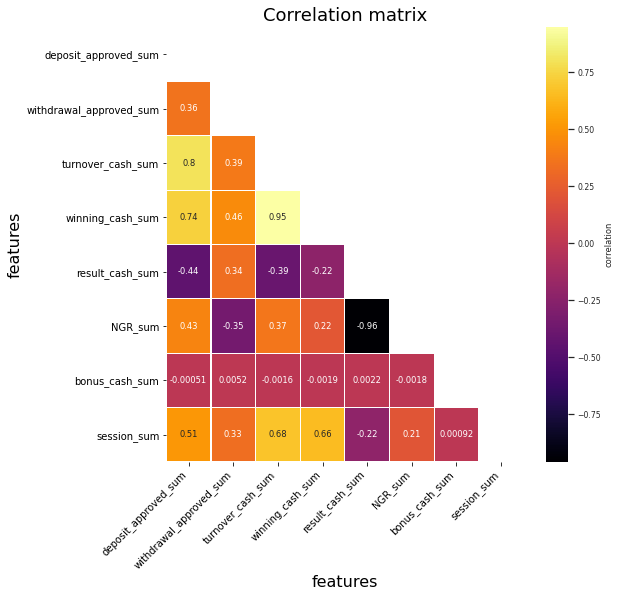

In [15]:
# Correlation matrix completely ignores any non-numeric column.
fig, ax = plt.subplots(figsize=(8, 8))

matrix = np.triu(churn.corr("spearman"))
sns.set(font_scale=0.7)
sns.heatmap(
    churn.corr(method="spearman"),
    linewidth=0.1,
    annot=True,
    cmap="inferno",
    cbar_kws={"label": "correlation"},
    mask=matrix,
)
plt.xlabel("features", size=16)
plt.xticks(rotation=45, ha="right")
plt.ylabel("features", size=16)
plt.title("Correlation matrix", size=18)
plt.show()
plt.close()

The strongest correlations occur between the features:
* `winning_cash_sum` and `turnover_cash_sum` (positive correlation)
* `NRG_sum` and `result_cash_sum` (negative correlation)

### Summary
We can summarize what we have so far:

|||
|-----------------------------------|---------------------------------------------------------|
|data set dimensions                | ${117398 \times 12}$                                    |
|number of different customers      | ${10644}$                                               |
|${4}$ gambling modalities          | ${71\%}$ `cassino_classic`                              |
|                                   | ${16\%}$ `sports`                                       |
|                                   | ${10\%}$ `cassino_live`                                 |
|                                   |${3\%}$ `mixture`                                        |
|gender distribution                |${71\%}$ male                                            |
|                                   |${29\%}$ female                                          |
|numerical features                 |${8}$                                                    |
|categorical features               | ${4}$                                                   | 
|missing values                     |`gender`:     ${471}$ (less than ${1\%}$ of the dataset) |
|                                   |`vertical`:   ${4091}$ (less than ${3\%}$ of the dataset)|
|Strongest correlations between     |`winning_cash_sum` and `turnover_cash_sum` (positive)    |
|                                   |`NRG_sum` and `result_cash_sum` (negative)               |







In [16]:
# save daframe to file
churn.to_csv("../data/df_from_eda.csv", index=False)

### Creating HTML reports with `sweetviz`

A faster way to perform an EDA with a few lines of code is using the library `sweetviz` that takes pandas dataframes and creates an HTML report that can be viewed by itself in a browser or integrated into notebooks.

The code bellow will generate a html report. It is recommended to open it on the browser instead of Jupyter.

In [17]:
# analyzing the dataset using sweetviz
eda_report = sv.analyze(churn)

# to automaticaly display the report on your browser set open_browser=True
eda_report.show_html("../reports/eda_report.html", scale=0.8, open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report ../reports/eda_report.html was generated.


In [18]:
# compare by gender
gender_report = sv.compare_intra(churn, churn["gender"] == "male", ["Male", "Female"])

# to automaticaly display the report on your browser set open_browser=True
gender_report.show_html("../reports/gender_report.html", scale=0.8, open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report ../reports/gender_report.html was generated.
